In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,May_5,February_2,August,April_7,April_3,May_9,April_13,May_2,November_4,November_2,...,December,January_4,September_4,April_2,April_8,January_3,July,July_3,March,January_2
0,-0.175275,0.483186,-0.469484,-0.192907,-0.510503,0.056523,-0.139798,0.418716,-0.273291,-0.109396,...,-0.161747,0.604409,-0.012603,0.085459,-0.910773,0.480649,-0.599803,-0.084476,-0.907154,1.024350
1,-0.767088,0.116145,-0.469484,-0.155950,-0.239307,0.650787,-0.343262,0.410679,-0.273291,-0.109396,...,-0.161747,0.035629,-0.012603,0.229490,-0.614188,0.230043,-0.599803,-0.084476,-0.443577,0.737523
2,-0.225223,0.471996,-0.720683,-0.271062,-0.490269,-0.117836,-0.176245,-0.180583,0.155357,-0.311940,...,-0.143942,0.186294,-0.400264,0.118633,-0.519407,0.625498,-0.506850,-0.037638,-0.985656,0.707607
3,-0.321780,0.420501,-0.270299,0.424437,-0.429062,0.573503,-0.350389,0.463371,0.169539,-0.186002,...,0.157379,0.248668,0.110438,0.420907,-0.394411,0.102065,-0.322204,-0.335546,-0.320712,0.554919
4,-0.419739,0.158944,-0.794188,-0.115674,-0.327994,-0.201221,-0.457755,0.292913,-0.210600,-0.346547,...,-0.082236,-0.162981,0.144277,-0.049493,-0.031852,0.049449,-0.522521,-0.234432,-0.545358,0.646971
5,-0.525846,0.522460,-0.810097,0.022826,-0.711481,0.868295,-0.221788,-0.213229,-0.101336,-0.257244,...,0.156816,0.509715,0.054123,-0.195406,0.074234,0.213054,-0.592175,-0.375526,-0.212050,0.830451
6,-0.043810,0.014395,-0.177833,0.090922,-0.023152,0.184597,0.146627,0.282432,0.040463,-0.426177,...,-0.494695,0.305775,0.237874,0.344380,-0.093650,0.256707,-0.563354,-0.345080,-0.259086,0.781353
7,-0.391165,0.171814,-1.010284,-0.177244,-0.588995,0.145341,0.111823,0.844975,-0.193126,-0.607592,...,0.105736,0.219938,-0.431167,0.010624,0.030755,0.390634,-0.228093,-0.576947,-0.179778,0.805724
8,-0.261227,0.445708,-0.426508,-0.057897,-0.479884,0.333250,0.077770,0.495763,0.321171,-0.235158,...,-0.174863,0.221153,0.020960,0.443440,-0.646656,0.262402,-0.714455,-0.333695,-0.162627,0.440587
9,-0.571863,0.261804,-0.589004,0.377096,-0.374410,0.446709,-0.154538,0.406824,0.112349,-0.347571,...,0.067806,0.299635,-0.097211,-0.212123,-0.066338,0.342331,-0.738149,-0.669065,-0.041109,0.873517


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.14820287e+00,  8.46604291e-01,  4.93987433e-01,
        -1.38666439e+00,  1.28642413e-01, -1.19059994e+00,
        -1.02080814e-02,  7.93408267e-01, -1.14241968e+00,
         6.98441533e-01],
       [-7.12181490e-01, -1.43981540e+00,  4.93987433e-01,
        -1.24442718e+00,  1.37171900e+00,  1.24568302e+00,
        -8.04032398e-01,  7.62520528e-01, -1.14241968e+00,
         6.98441533e-01],
       [ 9.91190101e-01,  7.76902108e-01, -3.75732655e-01,
        -1.68746489e+00,  2.21386021e-01, -1.90541201e+00,
        -1.52410116e-01, -1.50970878e+00,  7.42110791e-01,
        -4.23141589e-01],
       [ 6.87659667e-01,  4.56120085e-01,  1.18362149e+00,
         9.89353439e-01,  5.01941216e-01,  9.28844580e-01,
        -8.31838859e-01,  9.65018104e-01,  8.04459129e-01,
         2.74236366e-01],
       [ 3.79720898e-01, -1.17320370e+00, -6.30227189e-01,
        -1.08941246e+00,  9.65204825e-01, -2.24726399e+00,
        -1.25072786e+00,  3.09944835e-01, -8.66801846e-01,
        -6.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.58207209,  1.58349574, -0.5242643 , -0.56834002, -0.09530993,
        -1.23143643,  0.70012832,  1.93545575,  0.08860568,  1.72019939],
       [ 0.5250594 , -0.32727854, -1.82921775, -0.79142582,  1.1233477 ,
         1.40762748,  2.3168683 ,  0.39000974, -1.15112758,  0.15761628],
       [ 1.48073281,  0.79271338,  0.88548891,  1.06403682,  0.39592217,
         0.09791316,  0.03693208, -1.63516606,  0.25577448,  0.58035655],
       [ 0.59774003,  0.6750798 , -0.08459292, -1.26569071, -0.47062222,
         0.05540889,  0.36205552,  0.46784355,  0.51027961,  0.84446834],
       [-2.11274412, -0.45579125, -0.44164646,  0.17494873, -0.69500983,
         0.38949863,  1.14419741,  0.92072275, -1.86459361,  1.24283277],
       [-0.49583296,  0.40012973,  0.24490058,  0.33259315, -1.97075278,
        -1.10168111, -1.65739502,  0.17237351,  0.44712753,  0.65096994],
       [ 0.7011007 ,  0.52891577,  1.16679071, -0.29266513, -0.27185182,
         0.08526558,  0.2714369 ,  0.05681414

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 25}
Best Score: 0.3650267019916649
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 23}
Best Score: 0.15284117319973994
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 21}
Best Score: 0.32991794172125843
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 2}
Best Score: 0.2510884443188761
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 6}
Best Score: 0.26094955433190825


In [13]:
y_pred_list

[array([ 0.12900276,  0.37040213, -0.16237008,  0.05989571,  0.06390855,
        -0.04097078,  0.31496036, -0.55204574,  0.11466106, -0.48809583,
        -0.56933222, -0.09797141,  0.26927431,  0.50204462,  0.09872096,
        -0.08516199]),
 array([ 0.14232007,  0.00490177, -0.20707284,  0.14061048, -0.02016632,
         0.06193062,  0.19625586, -0.51830797,  0.16680208, -0.06771748,
        -0.68035676, -0.06416688, -0.42668612,  0.33398629,  0.26518561,
        -0.01450725]),
 array([-0.06235911,  0.38645077, -0.11536591,  0.00089486, -0.03553038,
        -0.06706326,  0.08932173, -0.44231841,  0.05483503, -0.53981151,
        -0.37544002, -0.05667121,  0.31976109,  0.38442047,  0.02163515,
        -0.14951897]),
 array([-0.17201389,  0.97520833, -0.17201389, -0.17201389, -0.17201389,
        -0.17201389,  0.40027778,  0.40027778, -0.17201389, -0.62472222,
        -0.17201389, -0.17201389,  0.74340909,  0.74340909, -0.17201389,
        -0.17201389]),
 array([ 0.42038889,  0.99066667

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.4315785413984497,
 0.6069737410573823,
 0.39508564513749966,
 0.112232270191393,
 0.4329218262938601]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+hgt Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 25}
Best Score: 0.3650267019916649
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 23}
Best Score: 0.15284117319973994
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 21}
Best Score: 0.32991794172125843
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 2}
Best Score: 0.2510884443188761
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 6}
Best Score: 0.26094955433190825


In [21]:
y_pred_list_rf

[array([ 0.12900276,  0.37040213, -0.16237008,  0.05989571,  0.06390855,
        -0.04097078,  0.31496036, -0.55204574,  0.11466106, -0.48809583,
        -0.56933222, -0.09797141,  0.26927431,  0.50204462,  0.09872096,
        -0.08516199]),
 array([ 0.14232007,  0.00490177, -0.20707284,  0.14061048, -0.02016632,
         0.06193062,  0.19625586, -0.51830797,  0.16680208, -0.06771748,
        -0.68035676, -0.06416688, -0.42668612,  0.33398629,  0.26518561,
        -0.01450725]),
 array([-0.06235911,  0.38645077, -0.11536591,  0.00089486, -0.03553038,
        -0.06706326,  0.08932173, -0.44231841,  0.05483503, -0.53981151,
        -0.37544002, -0.05667121,  0.31976109,  0.38442047,  0.02163515,
        -0.14951897]),
 array([-0.17201389,  0.97520833, -0.17201389, -0.17201389, -0.17201389,
        -0.17201389,  0.40027778,  0.40027778, -0.17201389, -0.62472222,
        -0.17201389, -0.17201389,  0.74340909,  0.74340909, -0.17201389,
        -0.17201389]),
 array([ 0.42038889,  0.99066667

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.4315785413984497,
 0.6069737410573823,
 0.39508564513749966,
 0.112232270191393,
 0.4329218262938601]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+hgt Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/10 predictors/spearson/comparison plots/randomforest


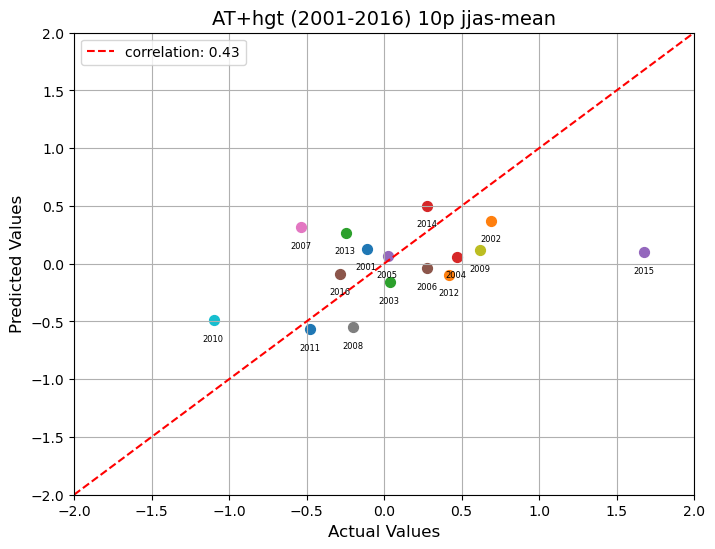

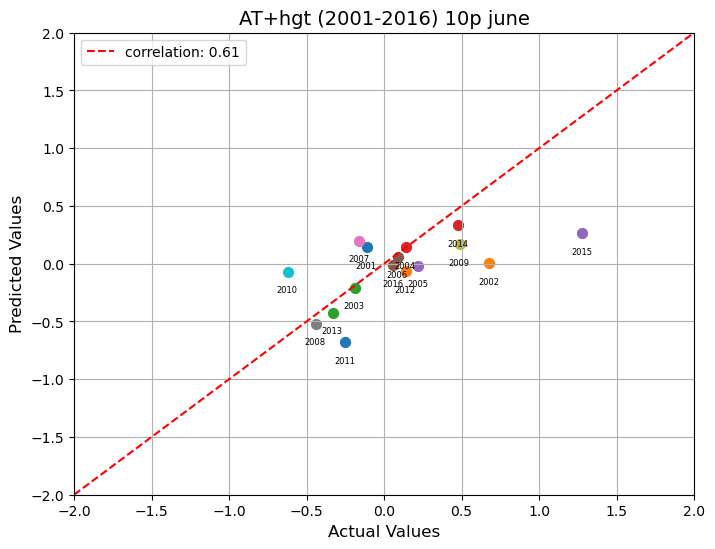

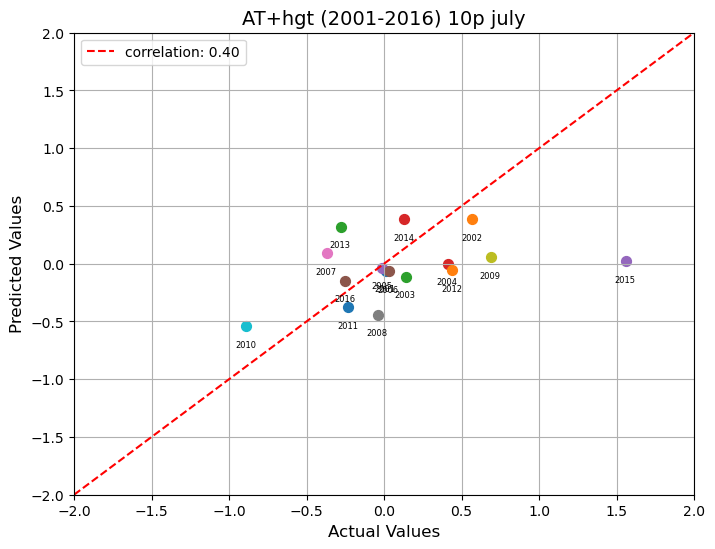

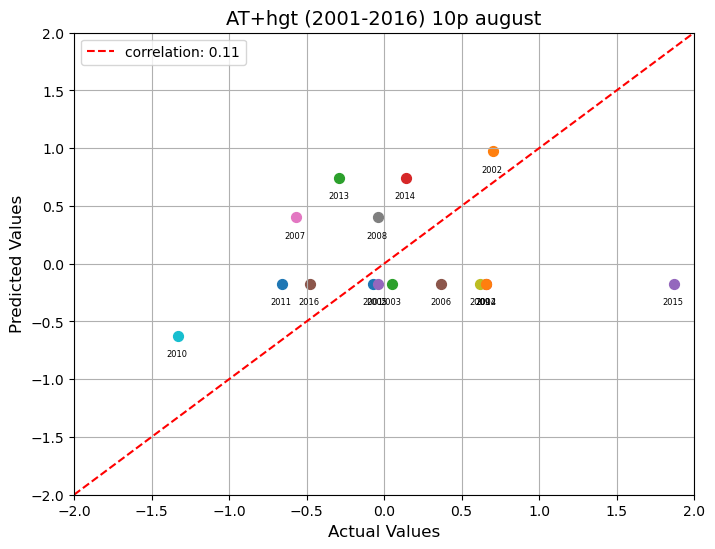

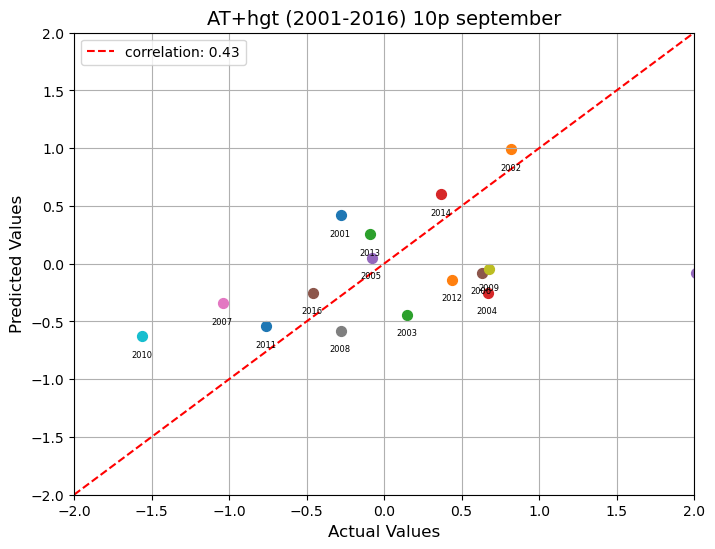

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=50)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show